## ĐỀ THI THỬ THỰC HÀNH NHẬP MÔN XỬ LÝ ẢNH


## Câu 1 (2 Điểm): Cho ảnh có tên là a.jpg và thực hiện các yêu cầu:
- Viết chương trình sử dụng mean filter cho ảnh (0.5 Điểm) 
- Viết chương trình sử dụng filter xác định biên của hình ảnh trên(0.5 Điểm) 
- Viết chương trình đổi màu ảnh từ không gian màu BGR sang một màu ngẫu nhiên (RGB) bằng cách thay đổi các kênh màu một cách ngẫu nhiên, sau đó lưu hình mới vào file a_random_color.jpg(0.5 Điểm) 
- Chuyển ảnh sang không gian màu HSV và tách riêng kênh Hue, Saturation, Value để lưu thành ba ảnh grayscale tương ứng (a_hue.jpg, a_saturation.jpg, a_value.jpg) (0.5 Điểm)


[[ 99 101 103 ...  87  89  90]
 [ 99 101 103 ...  85  87  88]
 [ 99 101 103 ...  82  83  84]
 ...
 [ 40  42  41 ...  60  62  64]
 [ 40  42  41 ...  61  64  65]
 [ 41  43  41 ...  62  64  66]]


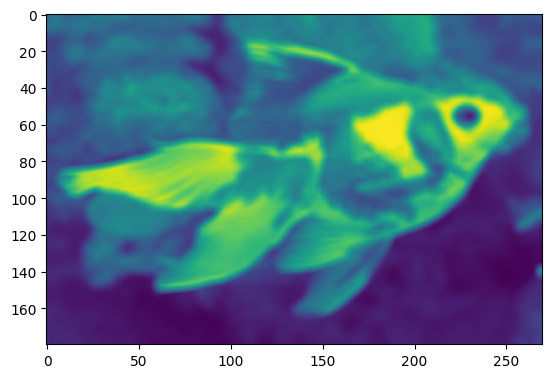

In [3]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys

a = iio.imread('a.jpg', mode ='F')

k = np.ones((5, 5))/25

b = sn.convolve(a, k).astype(np.uint8)
iio.imsave('a.jpg',b)

print(b)
plt.imshow(b)
plt.show()

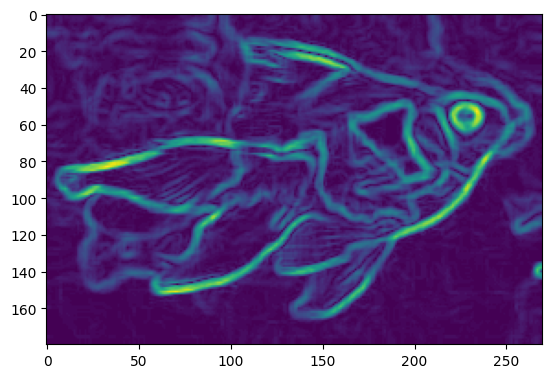

In [4]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import filters
import matplotlib.pylab as plt
import colorsys

a = iio.imread('a.jpg', mode='F')
b = filters.sobel(a).astype(np.uint8)

iio.imsave('a1.jpg', b)
plt.imshow(b)
plt.show()

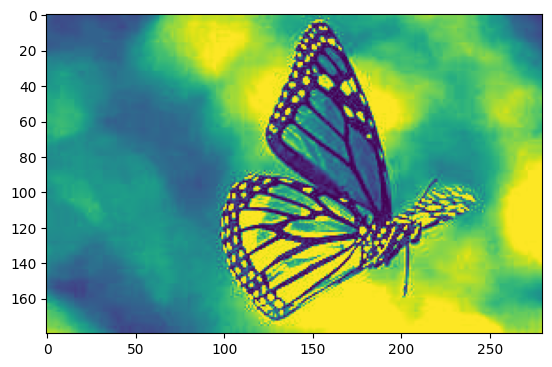

In [8]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('image1.jpg')

bdata = data[:, :, 1].astype(np.uint16) + data[:, :, 2].astype(np.uint16)  
bdata = np.clip(bdata, 0, 255).astype(np.uint8)  

iio.imsave('a_random_color.jpg', bdata)

tmp = iio.imread('a_random_color.jpg')
plt.imshow(tmp )
plt.show()


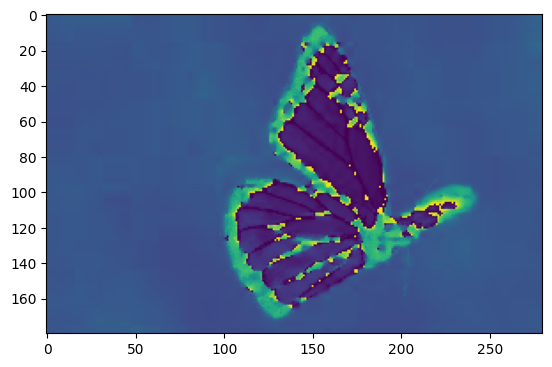

In [10]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys

rgb = iio.imread('image1.jpg')
rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
h, s, v = rgb2hsv(rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2])

h_img = (h * 255).astype(np.uint8)
s_img = (s * 255).astype(np.uint8)
v_img = (v * 255).astype(np.uint8)

iio.imwrite('a_hue.jpg', h_img)
iio.imwrite('a_saturation.jpg', s_img)
iio.imwrite('a_value.jpg', v_img)

plt.imshow(h_img)
plt.show()


## Viết một chương trình Python sử dụng OpenCV để tạo menu động cho phép người dùng chọn các phương pháp biến đổi ảnh từ một danh sách mở rộng, áp dụng cho nhiều ảnh cùng lúc, và thực hiện các phân tích bổ sung. Các yêu cầu cụ thể: 
1. Tạo một menu động cho phép người dùng chọn các phương pháp biến đổi ảnh sau:
Image inverse transformation(0.5 Điểm) 
Gamma-Correction (với giá trị gamma ngẫu nhiên từ 0.5 đến 2.0) (0.5 Điểm) 
Log Transformation (với hệ số nhân ngẫu nhiên từ 1.0 đến 5.0) (0.5 Điểm) 
Histogram equalization(0.5 Điểm) 
Contrast Stretching (tùy chỉnh với giá trị min và max ngẫu nhiên từ 0 đến 255) 
(0.5 Điểm) 
Adaptive Histogram Equalization (sử dụng CLAHE với ô lưới 8x8) (0.5 Điểm) 
2. Chương trình phải xử lý đồng thời ba ảnh đầu vào có tên image1.jpg, image2.jpg, và 
image3.jpg (0.5 Điểm) 
3. Khi người dùng nhấn các phím sau, chương trình sẽ thực hiện biến đổi tương ứng 
trên cả ba ảnh (0.5 Điểm) - - - - - - 
Phím I: Image inverse transformation  
Phím G: Gamma-Correction  
Phím L: Log Transformation  
Phím H: Histogram equalization  
Phím C: Contrast Stretching  
Phím A: Adaptive Histogram Equalization 
output_[phương 
4. Đối với mỗi biến đổi, lưu kết quả của từng ảnh vào các file riêng biệt với tên định 
dạng 
pháp]_[số ảnh].jpg (ví dụ: output_inverse_1.jpg, 
output_gamma_2.jpg).

Chương trình xử lý ảnh
Các phương pháp biến đổi ảnh:
I - Image inverse transformation
G - Gamma-Correction
L - Log Transformation
H - Histogram equalization
C - Contrast Stretching
Q - Thoát chương trình


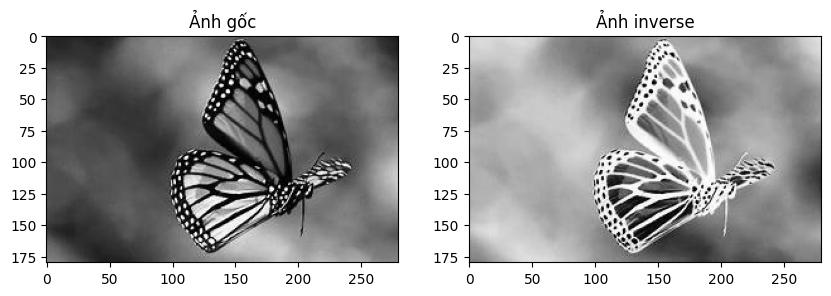

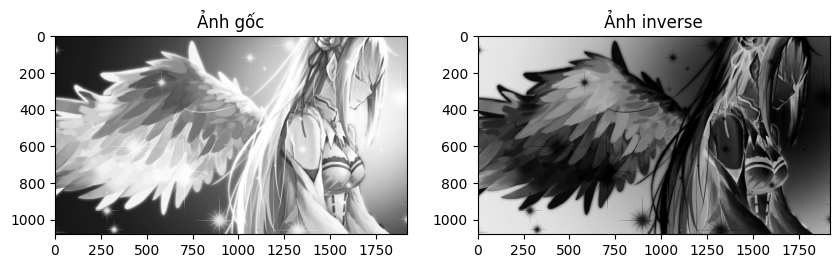

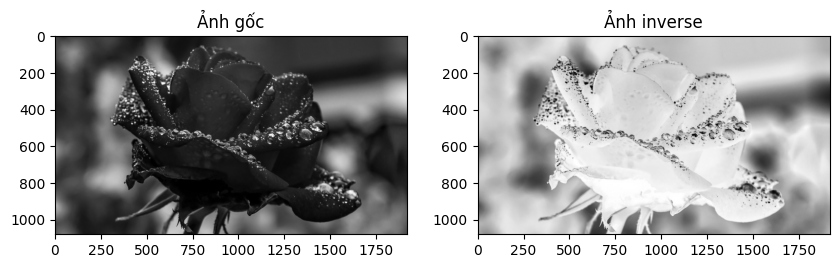

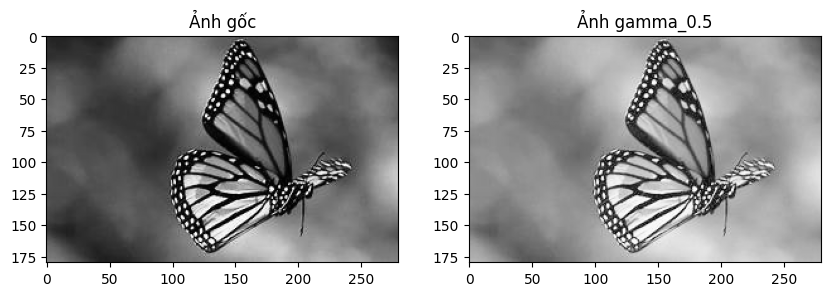

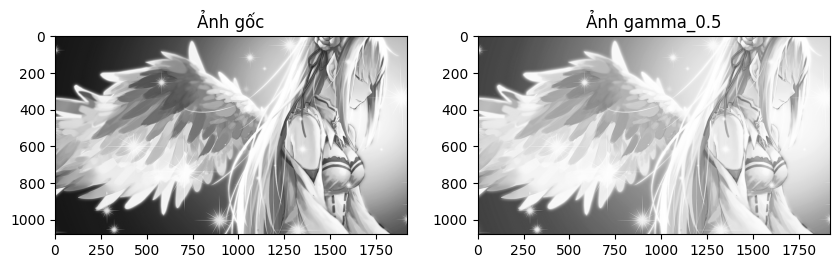

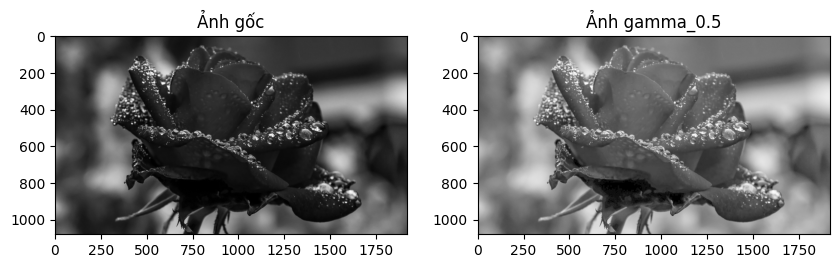

Kết thúc chương trình.


In [4]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = Image.open(img_path).convert('L')  
            images.append((filename, img))
        except:
            print(f"Không thể mở ảnh {filename}")
    return images

def image_inverse_transformation(img):
    img_array = np.asarray(img)
    inverted_img_array = 255 - img_array
    inverted_img = Image.fromarray(inverted_img_array)
    return inverted_img

def gamma_correction(img, gamma=0.5):
    img_array = np.asarray(img).astype(float)
    max_val = np.max(img_array)
    normalized = img_array / max_val
    corrected = np.power(normalized, gamma) * 255.0
    corrected_img = Image.fromarray(corrected.astype(np.uint8))
    return corrected_img

def log_transformation(img):
    img_array = np.asarray(img).astype(float)
    max_val = np.max(img_array)
    c = 255 / np.log(1 + max_val)
    log_transformed = c * np.log(1 + img_array)
    log_img = Image.fromarray(log_transformed.astype(np.uint8))
    return log_img

def histogram_equalization(img):
    img_array = np.asarray(img)
    img_flatten = img_array.flatten()
    hist, bins = np.histogram(img_flatten, 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = ((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype('uint8')
    equalized_img_array = cdf_normalized[img_flatten]
    equalized_img_array = np.reshape(equalized_img_array, img_array.shape)
    equalized_img = Image.fromarray(equalized_img_array)
    return equalized_img

def contrast_stretching(img):
    img_array = np.asarray(img).astype(float)
    a = img_array.min()
    b = img_array.max()
    stretched = 255 * (img_array - a) / (b - a)
    stretched_img = Image.fromarray(stretched.astype(np.uint8))
    return stretched_img

def process_images_in_folder(folder_path, process_func, output_folder, process_name):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    images = load_images_from_folder(folder_path)
    for filename, img in images:
        processed_img = process_func(img)
        
        output_filename = f"{os.path.splitext(filename)[0]}_{process_name}.png"
        output_path = os.path.join(output_folder, output_filename)
        processed_img.save(output_path)
        

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(img, cmap='gray')
        plt.title('Ảnh gốc')
        
        plt.subplot(1, 2, 2)
        plt.imshow(processed_img, cmap='gray')
        plt.title(f'Ảnh {process_name}')
        plt.show()

def main():
    input_folder = "b2"  
    output_folder = "processed_images"
    print("Chương trình xử lý ảnh")
    print("Các phương pháp biến đổi ảnh:")
    print("I - Image inverse transformation")
    print("G - Gamma-Correction")
    print("L - Log Transformation")
    print("H - Histogram equalization")
    print("C - Contrast Stretching")
    print("Q - Thoát chương trình")
    
    while True:
        choice = input("Nhập lựa chọn của bạn (I/G/L/H/C/Q): ").upper()
        
        if choice == 'Q':
            print("Kết thúc chương trình.")
            break
        elif choice == 'I':
            process_images_in_folder(input_folder, image_inverse_transformation, 
                                   output_folder, "inverse")
        elif choice == 'G':
            gamma = float(input("Nhập giá trị gamma (ví dụ 0.5): "))
            process_func = lambda img: gamma_correction(img, gamma)
            process_images_in_folder(input_folder, process_func, 
                                   output_folder, f"gamma_{gamma}")
        elif choice == 'L':
            process_images_in_folder(input_folder, log_transformation, 
                                   output_folder, "log_transform")
        elif choice == 'H':
            process_images_in_folder(input_folder, histogram_equalization, 
                                   output_folder, "hist_equalized")
        elif choice == 'C':
            process_images_in_folder(input_folder, contrast_stretching, 
                                   output_folder, "contrast_stretched")
        else:
            print("Lựa chọn không hợp lệ. Vui lòng chọn lại.")

if __name__ == "__main__":
    main()

## Câu 3 (4 Điểm): Viết một chương trình Python sử dụng OpenCV để xử lý ba ảnh: 
- colorful-ripe-tropical-fruits.jpg, quang-ninh.jpg, và pagoda.jpg với các phương pháp biến đổi và tiền xử lý nâng cao. - - - - 
- Tăng kích thước ảnh colorful-ripe-tropical-fruits.jpg thêm 30 pixel ở cả chiều rộng và chiều cao. (0.5 Điểm) 
- Xoay ảnh quang-ninh.jpg 45 độ theo chiều kim đồng hồ và lật ngang. (0.5 Điểm) 
- Tăng kích thước ảnh pagoda.jpg lên 5 lần và áp dụng Gaussian blur với kernel 7x7 để làm mịn. (0.5 Điểm) 

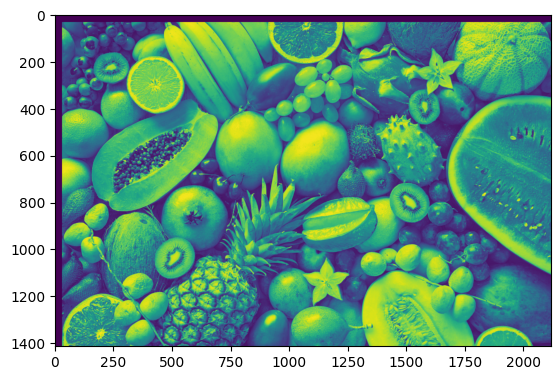

In [2]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('NM-XLA/colorful-ripe-tropical-fruits.jpg', mode ='F')

bdata = nd.shift(data, (30, 30))

plt.imshow(bdata)
plt.show()


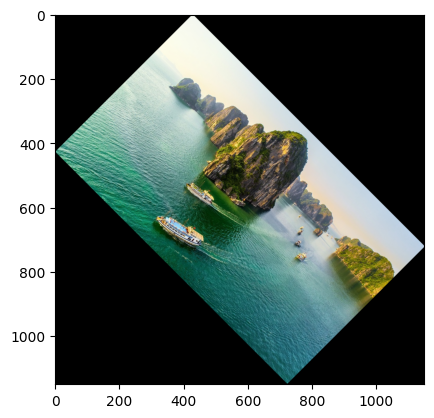

In [3]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread('NM-XLA/quang_ninh.jpg')

flipped = np.fliplr(data)

rotated = nd.rotate(flipped, -45, reshape=True)

plt.imshow(rotated)
plt.show()
